# Simple Linear Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('..\\Data\\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

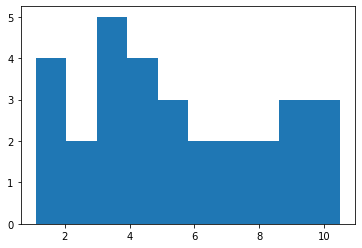

In [6]:
plt.hist(df['YearsExperience'])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

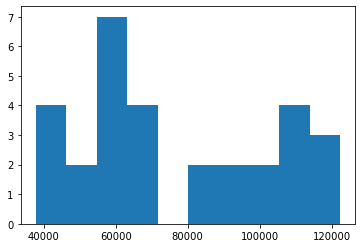

In [7]:
plt.hist(df['Salary'])

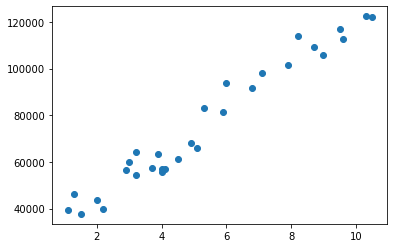

In [8]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [ ]:
# # X = df.iloc[:,0]

# X = df.loc[:,'YearsExperience']
# Y = df.loc[:,'Salary']

In [9]:
X = np.array(df.iloc[:,0]).reshape(-1,1)
Y = np.array(df.iloc[:,1]).reshape(-1,1)

In [10]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [11]:
# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=-1)

In [12]:
regressor

LinearRegression(n_jobs=-1)

In [13]:
regressor.fit(X_Train, Y_Train)

LinearRegression(n_jobs=-1)

In [14]:
# Predicting the Test set result
Y_Pred = regressor.predict(X_Test)

In [18]:
Y_Test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.],
       [112635.],
       [ 55794.],
       [ 83088.],
       [101302.]])

In [15]:
Y_Pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [21]:
res = Y_Test-Y_Pred

In [23]:
import seaborn as sns

C:\Users\PR269KB\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

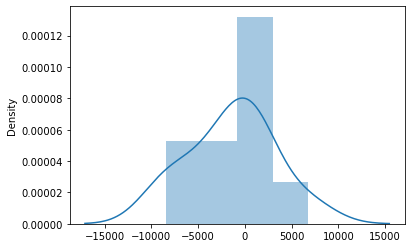

In [24]:
sns.distplot(res)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(Y_Test,Y_Pred)

0.9749154407708353

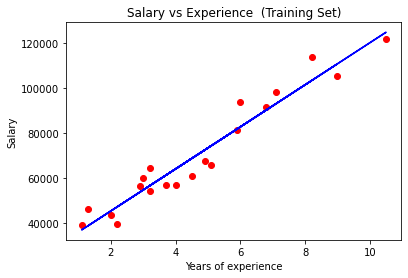

In [26]:
# Visualising the Training set results
plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

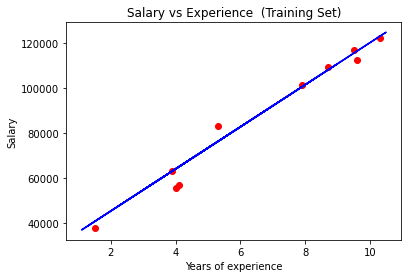

In [27]:
# Visualising the Test set results
plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
X_Test = pd.DataFrame(X_Test)

In [ ]:
X_Test['Y_True'] = Y_Test

In [ ]:
X_Test['y_pred'] = Y_Pred

In [ ]:
X_Test

In [ ]:
X_Test['residual'] = X_Test['Y_True'] - X_Test['y_pred']

In [ ]:
print(X_Test['residual'].mean())

In [ ]:
plt.hist(X_Test['residual'])

In [ ]:
sns.distplot(X_Test['residual'])

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
r2_score(Y_Test,Y_Pred)

In [29]:
'Y =' +str(regressor.coef_)+'*X + '+str(regressor.intercept_)

'Y =[[9345.94244312]]*X + [26816.19224403]'

In [30]:
regressor.predict([[12]])

array([[138967.5015615]])

In [31]:
9345.94244312*12+26816.19224403

138967.50156147

In [25]:
import statsmodels.api as sm

In [32]:
result = sm.OLS(Y,X).fit()

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                    2.56e-24
Time:                        18:33:24   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""